<a href="https://colab.research.google.com/github/liuchiente/Digital_Image_Process_at_NCHU/blob/main/Demo_with_Auto_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 連接並mount自己的雲端硬碟(點選跑出網址複製最後的授權碼貼上並執行)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# 切換到指定目錄
SYS_DIR = "/content/drive/My Drive/Colab Notebooks/AutoKerasDemos/"

In [4]:
import os
if os.path.isdir(SYS_DIR) is False:
  os.mkdir(SYS_DIR)
os.chdir(SYS_DIR)

In [5]:
# 安裝安裝AutoKeras
!pip3 install autokeras

     |████████████████████████████████| 166 kB 7.6 MB/s 
     |████████████████████████████████| 97 kB 6.0 MB/s 
     |████████████████████████████████| 454.4 MB 22 kB/s 
     |████████████████████████████████| 4.0 MB 36.8 MB/s 
     |████████████████████████████████| 462 kB 80.9 MB/s 
     |████████████████████████████████| 1.2 MB 68.9 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68711 sha256=ca068eca6cf02555bf30bd0054322e70c8a4810fda732a6442857671f17928d8
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0
  A

In [6]:
# 安裝 Tensorflow
!pip3 install tensorflow

In [7]:
# 引入基本函式庫
import autokeras as ak
import tensorflow as tf
from autokeras import ImageClassifier
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from sklearn.model_selection import train_test_split
from google.colab import files
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

In [9]:
# 這裡我要試驗的是手寫辨識Minst, 所以先下載 tensorflow內建的Minst資料集
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# 初始化Image classifier.
clf = ak.ImageClassifier(overwrite=True, max_trials=1)

In [ ]:
# 搜尋出最適合文字辨識的模型
clf.fit(x_train, y_train, epochs=10)

Trial 1 Complete [00h 24m 30s]
val_loss: 0.041977107524871826

Best val_loss So Far: 0.041977107524871826
Total elapsed time: 00h 24m 30s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
1875/1875 [==============================] - 166s 88ms/step - loss: 0.1612 - accuracy: 0.9508
Epoch 2/10
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0722 - accuracy: 0.9777
Epoch 3/10
1875/1875 [==============================] - 166s 89ms/step - loss: 0.0595 - accuracy: 0.9809
Epoch 4/10
1875/1875 [==============================] - 166s 88ms/step - loss: 0.0524 - accuracy: 0.9838
Epoch 5/10
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0452 - accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0423 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0383 - accuracy: 0.9876
Epoch 8/10
1875/1875 [==============================] - 163s 87ms/step - loss: 0.0353 - a

In [ ]:
# 使用最佳模型進行預測
predicted_y = clf.predict(x_test)
print(predicted_y)

313/313 [==============================] - 7s 22ms/step
[['7']
 ['2']
 ['1']
 ...
 ['4']
 ['5']
 ['6']]


In [ ]:
# 評估一下效果, 發現Accuracy準確率很高. Loss遺失率很低
print(clf.evaluate(x_test, y_test))

313/313 [==============================] - 7s 23ms/step - loss: 0.0316 - accuracy: 0.9908
[0.03162305802106857, 0.9908000230789185]


In [ ]:
# 比較 20 筆
print('prediction:', ' '.join(predicted_y[0:20].ravel()))
print('actual    :', ' '.join(y_test[0:20].astype(str)))

prediction: 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4
actual    : 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4


In [ ]:
# 匯出模型,下次還能使用
model = clf.export_model()
print(type(model))

<class 'tensorflow.python.keras.engine.functional.Functional'>


In [ ]:
# 匯出
try: 
    model.save("model_autokeras", save_format="tf") 
except Exception: 
    model.save("model_autokeras.h5") 

INFO:tensorflow:Assets written to: model_autokeras/assets


In [10]:
# 載入模型, 試驗效果
loaded_model = load_model("model_autokeras", custom_objects=ak.CUSTOM_OBJECTS)
predicted_y = loaded_model.predict(tf.expand_dims(x_test, -1))
print(predicted_y)

[[3.5315285e-11 3.9884953e-11 7.3827046e-08 ... 9.9999857e-01
  1.1987203e-10 9.1422594e-09]
 [9.6686648e-08 6.6718089e-06 9.9995053e-01 ... 2.2172313e-11
  2.5267784e-07 2.9833091e-11]
 [1.4508271e-09 9.9998415e-01 3.5923426e-07 ... 5.7796365e-07
  4.9587800e-07 7.2784863e-09]
 ...
 [6.9152585e-16 1.4168273e-13 5.0532385e-15 ... 5.1545426e-09
  6.7434321e-08 3.0874094e-08]
 [1.4812511e-08 8.7064917e-14 5.0199761e-10 ... 7.4768501e-13
  1.4996905e-05 3.8484083e-09]
 [1.3495284e-07 1.4627942e-14 2.2573968e-08 ... 8.7520489e-16
  1.1629662e-08 2.2409116e-11]]


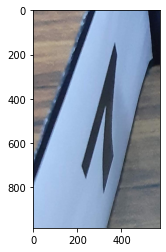

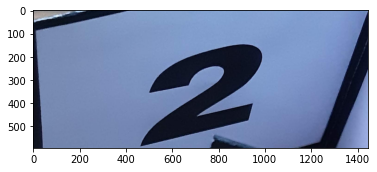

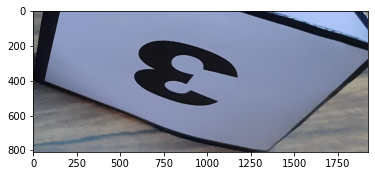

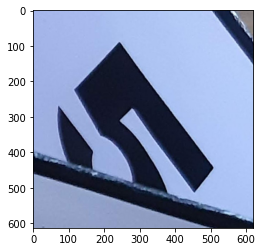

8
8
8
8


In [18]:
# 用實際圖片來測試效果
from skimage import io
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt

X_ALL = np.empty((0, 28, 28))
for i in [7,2,3,5]: 
    image1 = io.imread(f'./imgs/{i}.jpg', as_gray=True)
    plt.imshow(io.imread(f'./imgs/{i}.jpg'))
    plt.show()

    image_resized = resize(image1, (28, 28), anti_aliasing=True)    
    X1 = image_resized.reshape(1, 28, 28) #/ 255
    X1 = (np.abs(1-X1) * 255).astype(int)
    X_ALL = np.concatenate([X_ALL, X1])
predictions = loaded_model.predict(X_ALL)
for prediction in predictions:
  print(np.argmax(prediction, axis=0))